In [62]:
!pip install gradio opencv-python

In [2]:
import requests

In [3]:
def request_gpt(user_text, temperature=0.7, top_p=0.95, max_tokens=800):

    # endpoint
    # method
    # header
    # payload

    api_base="https://team10-eighti.openai.azure.com" 
    deployment_id="gpt-4o"  
    endpoint = f"{api_base}/openai/deployments/{deployment_id}/chat/completions?api-version=2024-08-01-preview"
    api_key = '1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw'
    
    search_endpoint="https://team10-eighti-search.search.windows.net"
    search_key = 'wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3'
    search_index="sign-index"
    semantic_name = "sign-semantic"

    method = requests.post
    headers = {
        "Content-Type": "application.json",
        "api-key": api_key
    }
    payload = {
        "messages": [
            {
                "role": "system",
                "content": "당신은 사용자가 수화 정보를 찾는데 도움을 주는 수화 AI 도우미입니다."
            },
            {
                "role": "user",
                "content": user_text
            }
        ],
        "temperature": temperature,
        "top_p": top_p,
        "frequency_penalty": 0,
        "presence_penalty": 0,
        "max_tokens": max_tokens,
        "stop": None,
        "data_sources": [
            {
                "type": "azure_search",
                "parameters": {
                    "endpoint": search_endpoint,
                    "index_name": search_index,
                    "semantic_configuration": semantic_name,
                    "query_type": "semantic",
                    "fields_mapping": {},
                    "filter": None,
                    "top_n_documents": 5,
                    "authentication": {
                        "type": "api_key",
                        "key": search_key
                    }
                }
            }
        ]
    }

    response = requests.post(endpoint, headers=headers, json=payload)
    # print(response.status_code)
    # print(response.text)

    if response.status_code == 200:
        response_json = response.json()
        content_text = response_json['choices'][0]['message']['content']
        citations = response_json['choices'][0]['message']['context']['citations'][0]['content'].split('\n')
        return content_text, citations
    else:
        return ""

content_text, citations_list = request_gpt("된장찌개가 수화로 어떻게 돼?", temperature=0.7, top_p=0.95, max_tokens=800)

print(content_text)
print(citations_list)

된장찌개를 수화로 표현하는 방법은 다음과 같습니다. 오른손의 손가락을 구부린 상태에서 왼손의 5지와 1·2·3·4지를 사이에 넣고 오른손 등이 스치게 한 후, 손바닥이 위로 향하게 하여 약간 구부린 왼손 위에서 같은 모양의 오른손을 두 번 오르내립니다 [doc1].
['음식', '손끝이 아래로 향하게 구부린 오른손의 손가락을 왼손의 5지와 1·2·3·4지 사이에 넣고 오른손 등이 스치게 뺀 다음, 손바닥이 위로 향하게 펴서 약간 구부린 왼손 밑에서 같은 모양의 오른손을 두 번 오르내린다.', 'http://sldict.korean.go.kr/multimedia/multimedia_files/convert/20201224/791296/IMG000357950_700X466.jpg http://sldict.korean.go.kr/multimedia/multimedia_files/convert/20151126/217119/IMG000208379_700X466.jpg', 'http://sldict.korean.go.kr/multimedia/multimedia_files/convert/20201210/784487/MOV000356911_700X466.mp4', '된장찌개']


In [4]:
def request_gpt(user_text, temperature=0.7, top_p=0.95, max_tokens=800):

    # endpoint
    # method
    # header
    # payload

    api_base="https://team10-eighti.openai.azure.com" 
    deployment_id="gpt-4o"  
    endpoint = f"{api_base}/openai/deployments/{deployment_id}/chat/completions?api-version=2024-08-01-preview"
    api_key = '1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw'
    
    search_endpoint="https://team10-eighti-search.search.windows.net"
    search_key = 'wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3'
    search_index="sign-index"
    semantic_name = "sign-semantic"

    method = requests.post
    headers = {
        "Content-Type": "application.json",
        "api-key": api_key
    }
    payload = {
        "messages": [
            {
                "role": "system",
                "content": "당신은 사용자가 수화 정보를 찾는데 도움을 주는 수화 AI 도우미입니다."
            },
            {
                "role": "user",
                "content": user_text
            }
        ],
        "temperature": temperature,
        "top_p": top_p,
        "frequency_penalty": 0,
        "presence_penalty": 0,
        "max_tokens": max_tokens,
        "stop": None,
        "data_sources": [
            {
                "type": "azure_search",
                "parameters": {
                    "endpoint": search_endpoint,
                    "index_name": search_index,
                    "semantic_configuration": semantic_name,
                    "query_type": "semantic",
                    "fields_mapping": {},
                    "filter": None,
                    "top_n_documents": 5,
                    "authentication": {
                        "type": "api_key",
                        "key": search_key
                    }
                }
            }
        ]
    }

    response = requests.post(endpoint, headers=headers, json=payload)

    if response.status_code == 200:
        response_json = response.json()
        content_text = response_json['choices'][0]['message']['content']
        citations = response_json['choices'][0]['message']['context']['citations'][0]['content'].split('\n')
        
        # citations_list에서 마지막 단어만 추출
        if citations:  # citations가 비어있지 않다면
            last_citation = citations[-1]  # 마지막 항목
            last_word = last_citation.split()[-1]  # 마지막 단어 추출
        else:
            last_word = ""  # citations가 비어있을 경우 빈 문자열 반환

        return content_text, citations, last_word
    else:
        return "", [], ""

content_text, citations_list, last_word = request_gpt("된장찌개가 수화로 어떻게 돼?", temperature=0.7, top_p=0.95, max_tokens=800)

print(content_text)
print(citations_list)
print(last_word)


된장찌개를 수화로 표현하는 방법은 다음과 같습니다: 오른손의 손가락을 왼손의 5지와 1·2·3·4지 사이에 넣고 오른손 등이 스치게 번 다음, 손바닥이 위로 향하게 해서 약간 구부린 왼손 밑에서 같은 모양의 오른손을 두 번 오르내립니다 [doc1].
['음식', '손끝이 아래로 향하게 구부린 오른손의 손가락을 왼손의 5지와 1·2·3·4지 사이에 넣고 오른손 등이 스치게 뺀 다음, 손바닥이 위로 향하게 펴서 약간 구부린 왼손 밑에서 같은 모양의 오른손을 두 번 오르내린다.', 'http://sldict.korean.go.kr/multimedia/multimedia_files/convert/20201224/791296/IMG000357950_700X466.jpg http://sldict.korean.go.kr/multimedia/multimedia_files/convert/20151126/217119/IMG000208379_700X466.jpg', 'http://sldict.korean.go.kr/multimedia/multimedia_files/convert/20201210/784487/MOV000356911_700X466.mp4', '된장찌개']
된장찌개


In [5]:
import requests

def request_gpt(user_text, temperature=0.7, top_p=0.95, max_tokens=800):
    api_base="https://team10-eighti.openai.azure.com" 
    deployment_id="gpt-4o"  
    endpoint = f"{api_base}/openai/deployments/{deployment_id}/chat/completions?api-version=2024-08-01-preview"
    api_key = '1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw'
    
    search_endpoint="https://team10-eighti-search.search.windows.net"
    search_key = 'wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3'
    search_index="sign-index"
    semantic_name = "sign-semantic"

    headers = {
        "Content-Type": "application.json",
        "api-key": api_key
    }
    payload = {
        "messages": [
            {
                "role": "system",
                "content": "당신은 사용자가 수화 정보를 찾는데 도움을 주는 수화 AI 도우미입니다."
            },
            {
                "role": "user",
                "content": user_text
            }
        ],
        "temperature": temperature,
        "top_p": top_p,
        "frequency_penalty": 0,
        "presence_penalty": 0,
        "max_tokens": max_tokens,
        "stop": None,
        "data_sources": [
            {
                "type": "azure_search",
                "parameters": {
                    "endpoint": search_endpoint,
                    "index_name": search_index,
                    "semantic_configuration": semantic_name,
                    "query_type": "semantic",
                    "fields_mapping": {},
                    "filter": None,
                    "top_n_documents": 5,
                    "authentication": {
                        "type": "api_key",
                        "key": search_key
                    }
                }
            }
        ]
    }

    response = requests.post(endpoint, headers=headers, json=payload)

    if response.status_code == 200:
        response_json = response.json()
        content_text = response_json['choices'][0]['message']['content']
        citations = response_json['choices'][0]['message']['context']['citations'][0]['content'].split('\n')
        
        # citations_list에서 마지막 단어만 추출
        if citations:  # citations가 비어있지 않다면
            last_citation = citations[-1]  # 마지막 항목
            last_word = last_citation.split()[-1]  # 마지막 단어 추출
        else:
            last_word = ""  # citations가 비어있을 경우 빈 문자열 반환

        # 자음과 모음 분리 기능 추가
        def split_hangul(last_word):
            initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
            medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
            final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

            jamo_list = []
            for char in last_word:
                if '가' <= char <= '힣':  # 한글 음절인지 확인
                    code = ord(char) - ord('가')
                    initial = code // (21 * 28)
                    medial = (code % (21 * 28)) // 28
                    final = code % 28
                    jamo_list.append((initial_consonants[initial], medial_vowels[medial], final_consonants[final]))
                else:
                    jamo_list.append(('', '', ''))  # 한글이 아닐 경우 빈 문자열 추가

            return jamo_list
        
        # 자음과 모음 분리 출력
        separated_last_word = split_hangul(last_word)
        print(last_word)
        print(separated_last_word)

        return content_text, citations, last_word
    else:
        return "", [], ""


자음 & 모음 분리코드

지문자 기반 자음/모음 반영한 초/중/종성 리스트

initial_consonants = ['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ'] 14개
medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ'] 17개
final_consonants = ['', 'ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ'] 15개

In [6]:
def split_hangul(word):
    # 수정된 초/중/종성 리스트
    initial_consonants = ['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    # 각 리스트의 길이
    num_initials = len(initial_consonants)  # 14개
    num_medials = len(medial_vowels)       # 17개
    num_finals = len(final_consonants)     # 15개

    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')  # '가'의 유니코드 값 빼기

            # 초성 계산 (초성: 0~13)
            initial = code // (num_medials * num_finals)

            # 중성 계산 (중성: 0~16)
            medial = (code % (num_medials * num_finals)) // num_finals

            # 종성 계산 (종성: 0~14)
            final = code % num_finals

            # 초성, 중성, 종성 추가
            if initial < num_initials:  # 초성 범위 체크
                separated.append(initial_consonants[initial])  # 초성 추가
            if medial < num_medials:  # 중성 범위 체크
                separated.append(medial_vowels[medial])       # 중성 추가
            if final < num_finals:  # 종성 범위 체크
                separated.append(final_consonants[final])  # 종성 추가

    return separated


In [7]:
# 테스트
word = "사과"

separated_word = split_hangul(word)

print(separated_word)

['ㅟ', 'ㅌ', 'ㄱ', 'ㅣ', 'ㅌ']


챗GPT 추천 초/중/종성 리스트

In [8]:
def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated

In [9]:
# 테스트 단어
word = input("")

# 자음과 모음 분리
separated_word = split_hangul(word)

# 결과 출력
print(separated_word)

['ㅅ', 'ㅜ', 'ㅂ', 'ㅏ', 'ㄱ']


이미지로 연결하기 위한 작업

한글 자음&모음 딕셔너리

In [10]:
hangul_dict = {
        "Giyeok": "ㄱ",
        "Nieun": "ㄴ",
        "Digeut": "ㄷ",
        "Rieul": "ㄹ",
        "Mieum": "ㅁ",
        "Bieup": "ㅂ",
        "Siot": "ㅅ",
        "Ieung": "ㅇ",
        "Jieut": "ㅈ",
        "Chieut": "ㅊ",
        "Kieuk": "ㅋ",
        "Tieut": "ㅌ",
        "Pieup": "ㅍ",
        "Hieut": "ㅎ",
        "A": "ㅏ",
        "Ya": "ㅑ",
        "Eo": "ㅓ",
        "Yeo": "ㅕ",
        "O": "ㅗ",
        "Yo": "ㅛ",
        "U": "ㅜ",
        "Yu": "ㅠ",
        "Eu": "ㅡ",
        "Yi": "ㅣ",
        "Ae": "ㅐ",
        "Yae": "ㅒ",
        "E": "ㅔ",
        "Ye": "ㅖ",
        "Oe": "ㅚ",
        "Wi": "ㅟ",
        "Ui": "ㅢ"
    }

In [11]:
# 예시로 딕셔너리 출력
print(hangul_dict)

{'Giyeok': 'ㄱ', 'Nieun': 'ㄴ', 'Digeut': 'ㄷ', 'Rieul': 'ㄹ', 'Mieum': 'ㅁ', 'Bieup': 'ㅂ', 'Siot': 'ㅅ', 'Ieung': 'ㅇ', 'Jieut': 'ㅈ', 'Chieut': 'ㅊ', 'Kieuk': 'ㅋ', 'Tieut': 'ㅌ', 'Pieup': 'ㅍ', 'Hieut': 'ㅎ', 'A': 'ㅏ', 'Ya': 'ㅑ', 'Eo': 'ㅓ', 'Yeo': 'ㅕ', 'O': 'ㅗ', 'Yo': 'ㅛ', 'U': 'ㅜ', 'Yu': 'ㅠ', 'Eu': 'ㅡ', 'Yi': 'ㅣ', 'Ae': 'ㅐ', 'Yae': 'ㅒ', 'E': 'ㅔ', 'Ye': 'ㅖ', 'Oe': 'ㅚ', 'Wi': 'ㅟ', 'Ui': 'ㅢ'}


In [12]:
!pip install hangul_utils

  Using cached hangul_utils-0.4.5-py3-none-any.whl.metadata (1.1 kB)
  Using cached hangul_utils-0.4.4-py3-none-any.whl.metadata (1.1 kB)
  Using cached hangul_utils-0.4.3-py3-none-any.whl.metadata (1.1 kB)
  Using cached hangul_utils-0.4.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached hangul_utils-0.4.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached hangul_utils-0.4-py3-none-any.whl.metadata (1.1 kB)
  Using cached hangul-utils-0.3.0.tar.gz (4.3 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


Requested hangul_utils from https://files.pythonhosted.org/packages/b8/af/9e1beb71959c171d0dfbdd16e475a3ef45bc4bb4b5fd3d5816aad1c46c3c/hangul_utils-0.4.5-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    mecab-python (==0.996-ko-0.9.2)
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested hangul_utils from https://files.pythonhosted.org/packages/26/cf/3347a5fa6512dc05a6b840a77fb6067ff89a87587d141959b80c26518208/hangul_utils-0.4.4-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    mecab-python (==0.996-ko-0.9.2)
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested hangul_utils from https://files.pythonhosted.org/packages/10/d1/fec9e5bab644a42b46e25dc43b71d1c43750438d26faf0c77f6cda6ac850/hangul_utils-0.4.3-py3-none-any.whl has invalid metadata: Expected matching RIGHT_P

한글 이미지랑 연결

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


# 지문자 검색어
word = input("두 개의 낱말로 이루어진 식품을 입력해주세요.")

# 지문가 검색어 분리
def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated


# 자음과 모음 분리
separated_word = split_hangul(word)

# 결과 출력
print(separated_word)


# 한글 자음모음 & 커스텀비전 태그 연결 딕셔너리
hangul_dict = {"Giyeok": "ㄱ", "Nieun": "ㄴ", "Digeut": "ㄷ", "Rieul": "ㄹ", "Mieum": "ㅁ", "Bieup": "ㅂ", "Siot": "ㅅ",
        "Ieung": "ㅇ", "Jieut": "ㅈ", "Chieut": "ㅊ", "Kieuk": "ㅋ", "Tieut": "ㅌ", "Pieup": "ㅍ", "Hieut": "ㅎ",
        "A": "ㅏ", "Ya": "ㅑ", "Eo": "ㅓ", "Yeo": "ㅕ", "O": "ㅗ", "Yo": "ㅛ", "U": "ㅜ", "Yu": "ㅠ", "Eu": "ㅡ",
        "Yi": "ㅣ", "Ae": "ㅐ", "Yae": "ㅒ", "E": "ㅔ", "Ye": "ㅖ", "Oe": "ㅚ", "Wi": "ㅟ", "Ui": "ㅢ"}

# 역딕셔너리 생성 (값 -> 키 변환용)
reverse_hangul_dict = {value: key for key, value in hangul_dict.items()}

# 분리된 자음, 모음을 딕셔너리 키 값으로 변환 출력
result = []
for char in separated_word:
    for jamo in char:
        if jamo in reverse_hangul_dict:
            result.append(reverse_hangul_dict[jamo])

print(result)

['ㅅ', 'ㅜ', 'ㅂ', 'ㅏ', 'ㄱ']
['Siot', 'U', 'Bieup', 'A', 'Giyeok']


['ㅅ', 'ㅜ', 'ㅂ', 'ㅏ', 'ㄱ']
['Siot', 'U', 'Bieup', 'A', 'Giyeok']


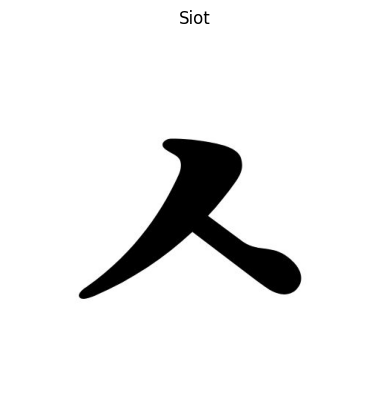

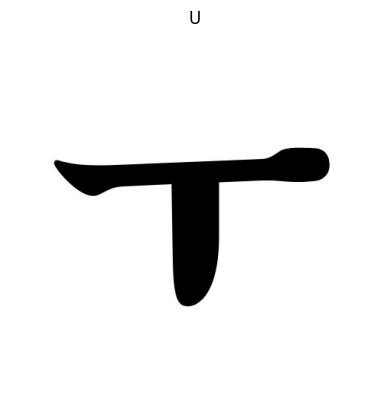

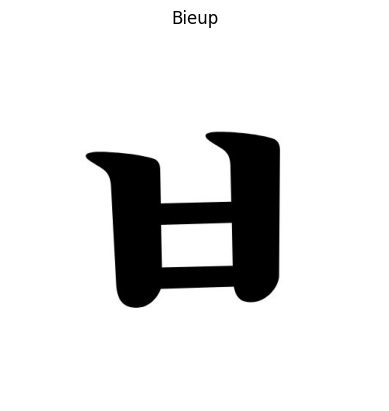

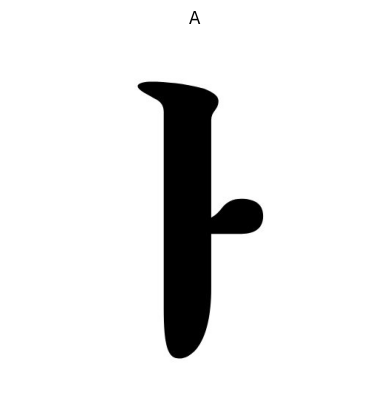

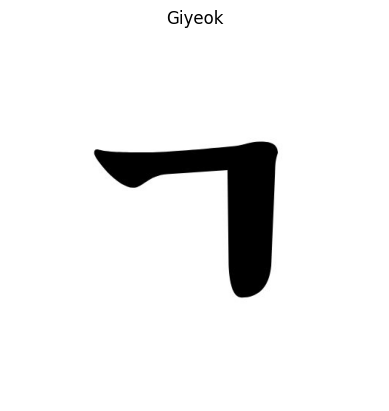

2024-12-20 16:40:31.912 | INFO     | __main__:request_gpt:225 - 채팅 답변 = 요청된 정보는 검색된 데이터에서 찾을 수 없습니다. 다른 쿼리나 주제를 시도해 보세요.
2024-12-20 16:40:31.914 | INFO     | __main__:request_gpt:245 - citations(empty) = []


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


# 지문자 검색어
word = input("두 개의 낱말로 이루어진 식품을 입력해주세요.")

# 지문가 검색어 분리
def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated


# 자음과 모음 분리
separated_word = split_hangul(word)

# 결과 출력
print(separated_word)


# 한글 자음모음 & 커스텀비전 태그 연결 딕셔너리
hangul_dict = {"Giyeok": "ㄱ", "Nieun": "ㄴ", "Digeut": "ㄷ", "Rieul": "ㄹ", "Mieum": "ㅁ", "Bieup": "ㅂ", "Siot": "ㅅ",
        "Ieung": "ㅇ", "Jieut": "ㅈ", "Chieut": "ㅊ", "Kieuk": "ㅋ", "Tieut": "ㅌ", "Pieup": "ㅍ", "Hieut": "ㅎ",
        "A": "ㅏ", "Ya": "ㅑ", "Eo": "ㅓ", "Yeo": "ㅕ", "O": "ㅗ", "Yo": "ㅛ", "U": "ㅜ", "Yu": "ㅠ", "Eu": "ㅡ",
        "Yi": "ㅣ", "Ae": "ㅐ", "Yae": "ㅒ", "E": "ㅔ", "Ye": "ㅖ", "Oe": "ㅚ", "Wi": "ㅟ", "Ui": "ㅢ"}

# 역딕셔너리 생성 (값 -> 키 변환용)
reverse_hangul_dict = {value: key for key, value in hangul_dict.items()}

# 분리된 자음, 모음을 딕셔너리 키 값으로 변환 출력
result = []
for char in separated_word:
    for jamo in char:
        if jamo in reverse_hangul_dict:
            result.append(reverse_hangul_dict[jamo])

print(result)

# 이미지 불러오기 및 출력
image_folder = "./Images/Basic"  # 이미지 폴더 경로

# 이미지 파일 불러오기
for tag in result:
    image_path = os.path.join(image_folder, f"{tag}.jpg")
    if os.path.exists(image_path):  # 파일이 존재하는지 확인
        img = mpimg.imread(image_path)  # 이미지 읽기
        plt.figure()  # 새로운 그림 생성
        plt.imshow(img)  # 이미지 출력
        plt.axis('off')  # 축 제거
        plt.title(tag)  # 이미지 제목으로 태그 표시
        plt.show()  # 이미지 표시
    else:
        print(f"이미지 {image_path}를 찾을 수 없습니다.")



이미지 연결까지 완성!
이미지를 그라디오로 구현하는 데, 최대 자음, 모음 분리된 것이 6개까지지

1. Gallery -> Images에서 파일불러오기
2. 6개 자음모음으로 제한
3. 사이즈 줄여서 하나의 창 안에 6개가 다 들어오게 하기

영준님 코드 #1

In [17]:
!pip install loguru

In [18]:
import requests
import gradio as gr
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from loguru import logger
import cv2
import numpy as np
import io
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import time

ENDPOINT = "https://team10eighticustomvision-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "9FRZbiwBubFIcSZ1k88tCTCskOAZwMMAMvnFLuVJ26tlU0V0fsqjJQQJ99ALACYeBjFXJ3w3AAAIACOGOj1S"
PROJECT_ID = "4218ecac-688a-422b-9e14-2726b938f67c"
PUBLISHED_NAME = "Iteration8"
 
# Initialize the prediction client
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

# 역딕셔너리 생성 (값 -> 키 변환용)
hangul_dict = {"Giyeok": "ㄱ", "Nieun": "ㄴ", "Digeut": "ㄷ", "Rieul": "ㄹ", "Mieum": "ㅁ", "Bieup": "ㅂ", "Siot": "ㅅ",
        "Ieung": "ㅇ", "Jieut": "ㅈ", "Chieut": "ㅊ", "Kieuk": "ㅋ", "Tieut": "ㅌ", "Pieup": "ㅍ", "Hieut": "ㅎ",
        "A": "ㅏ", "Ya": "ㅑ", "Eo": "ㅓ", "Yeo": "ㅕ", "O": "ㅗ", "Yo": "ㅛ", "U": "ㅜ", "Yu": "ㅠ", "Eu": "ㅡ",
        "Yi": "ㅣ", "Ae": "ㅐ", "Yae": "ㅒ", "E": "ㅔ", "Ye": "ㅖ", "Oe": "ㅚ", "Wi": "ㅟ", "Ui": "ㅢ"}

reverse_hangul_dict = {value: key for key, value in hangul_dict.items()}

def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated

def draw_boxes(image, predictions):
    """가장 확률이 높은 객체만 경계 상자를 그리도록 수정"""
    img = image.copy()
    
    # 예측 결과 중 확률이 가장 높은 하나를 선택
    if predictions:
        highest_prediction = max(predictions, key=lambda p: p.probability)
        
        # if first_char_is_inprogress:
        logger.info(str(highest_prediction.tag_name) + " " + str(highest_prediction.probability))
            # if highest_prediction.tag_name == first_char and highest_prediction.probability > 0.7:
                # global first_char_succeed
                # first_char_succeed = True
                # print("First character detected successfully!")
        
        # 확률이 0.5 이상인 객체만 선택
        if highest_prediction.probability > 0.5:
            color = (255, 0, 0)  # 경계 상자 색상 (빨간색)
            box = highest_prediction.bounding_box
            left = int(box.left * img.shape[1])
            top = int(box.top * img.shape[0])
            width = int(box.width * img.shape[1])
            height = int(box.height * img.shape[0])

            # 경계 상자 그리기
            cv2.rectangle(img, 
                        (left, top), 
                        (left + width, top + height), 
                        color, 
                        2)
            
            # 라벨과 확률 텍스트 추가
            label = f"{highest_prediction.tag_name}: {highest_prediction.probability:.2f}"
            cv2.putText(img, 
                        label, 
                        (left, top - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        2)
    
    return img, highest_prediction.tag_name

def click_sign_send(sign_word):
    split_sign = split_hangul(sign_word)
    logger.info(sign_word + " " + str(split_sign))

    gallery_images = []
    sign_confirmed = []

    for sign in split_sign:
        sign_file_name = reverse_hangul_dict[sign]
        gallery_images.append(f"./images/Basic/{sign_file_name}.jpg")
        sign_confirmed.append(False)
    
    return gr.update(visible=False), gr.update(visible=True), gallery_images, sign_confirmed

#################################
# 카메라 인식 부분
#################################
def process_frame(frame, sign_word, sign_confirmed):
    if frame is None:
        return None
    
    # Convert frame to PIL Image
    pil_image = Image.fromarray(frame)
    
    # Save to bytes for Azure API
    img_byte_arr = io.BytesIO()
    pil_image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    try:
        # Get predictions from Azure Custom Vision
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_NAME, img_byte_arr)
        
        # Draw boxes on frame
        annotated_frame, tag_name = draw_boxes(frame, results.predictions)

        gallery_images = []

        split_sign = split_hangul(sign_word)
        confirmed_list = list(sign_confirmed)

        i = 0
        for sign in split_sign:
            sign_file_name = reverse_hangul_dict[sign]
            sign_confirmed = confirmed_list[i]

            if sign_confirmed:
                gallery_images.append(f"./images/Correct/{sign_file_name}.jpg") 
            else:
                if sign_file_name == tag_name:
                    gallery_images.append(f"./images/Correct/{sign_file_name}.jpg") 
                    confirmed_list[i] = True
                else :    
                    gallery_images.append(f"./images/Basic/{sign_file_name}.jpg") 
            i = i+1

        return annotated_frame, gallery_images, str(confirmed_list)
    
    except Exception as e:
        logger.error(f"Error during prediction: {e}")
        return frame, []


def request_gpt(user_text, temperature=0.7, top_p=0.95, max_tokens=800):

    # endpoint
    # method
    # header
    # payload

    api_base="https://team10-eighti.openai.azure.com" 
    deployment_id="gpt-4o"  
    endpoint = f"{api_base}/openai/deployments/{deployment_id}/chat/completions?api-version=2024-08-01-preview"
    api_key = '1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw'
    
    search_endpoint="https://team10-eighti-search.search.windows.net"
    search_key = 'wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3'
    search_index="sign-index"
    semantic_name = "sign-semantic"

    method = requests.post
    headers = {
        "Content-Type": "application.json",
        "api-key": api_key
    }
    payload = {
        "messages": [
            {
                "role": "system",
                "content": "당신은 사용자가 수화 정보를 찾는데 도움을 주는 수화 AI 도우미입니다."
            },
            {
                "role": "user",
                "content": user_text
            }
        ],
        "temperature": temperature,
        "top_p": top_p,
        "frequency_penalty": 0,
        "presence_penalty": 0,
        "max_tokens": max_tokens,
        "stop": None,
        "data_sources": [
            {
                "type": "azure_search",
                "parameters": {
                    "endpoint": search_endpoint,
                    "index_name": search_index,
                    "semantic_configuration": semantic_name,
                    "query_type": "semantic",
                    "fields_mapping": {},
                    "filter": None,
                    "top_n_documents": 5,
                    "authentication": {
                        "type": "api_key",
                        "key": search_key
                    }
                }
            }
        ]
    }

    response = requests.post(endpoint, headers=headers, json=payload)
    # print(response.status_code)
    # print(response.text)

    if response.status_code == 200:
        response_json = response.json()
        content_text = response_json['choices'][0]['message']['content']
        logger.info(f"채팅 답변 = {content_text}")

        # citations = response_json['choices'][0]['message']['context']['citations'][0]['content'].split('\n')
        citations = response_json['choices'][0]['message']['context']['citations']
        if len(citations) > 0:
            logger.info(f"citations = {citations}")
            citations_movie = get_citations(citations, "mp4")
            citations_images = get_citations(citations, "jpg").split(' ')
            logger.info(f"citations_movie = {citations_movie}")
            logger.info(f"citations_images = {citations_images}")
            citations_images_first = None
            citations_images_second = None

            if (len(citations_images) > 0 ):
                citations_images_first = get_image_url(citations_images[0])

                print(citations_images_first)
                if (len(citations_images) > 1 ):
                    citations_images_second = citations_images[1]
        else:
            logger.info(f"citations(empty) = {citations}")
            
            citations_movie = "No Video"
            citations_images_first = None
            citations_images_second = None

        return content_text, citations_movie, citations_images_first, citations_images_second
    else:
        return "", "No Video", None, None

def get_citations(citations="", extentions="mp4"):
    logger.info(f"****get_citations = {citations}")
    if len(citations) > 0 and len(citations[0]) > 0 and len(citations[0]['content']) > 0:
        contents = citations[0]['content'].split('\n')

        for row in contents:
            row_list = row.split('.')
            if row_list[-1] == extentions:
                print("extentions=", extentions, "|row=",  row)
                return row

    return ""

def get_image_url(url):

    if not url.strip():
        return None  # 빈값 처리
    try:
        response = requests.get(url)
        response.raise_for_status()  # HTTP 에러 확인
        img = Image.open(BytesIO(response.content))  # 이미지를 메모리에서 읽음
        return img
    except Exception as e:
        return f"Error fetching image: {str(e)}"

def click_send(prompt, histories):
    # history_list = get_history_messages(histories=histories)
    # response_text, citation_html = request_gpt(prompt, history_list)
    response_text, citations_movie, citations_images_first, citations_images_second = request_gpt(prompt)
    histories.append((prompt, response_text))
    return histories, "", citations_movie, citations_images_first, citations_images_second, gr.update(visible=True), gr.update(visible=False)

with gr.Blocks() as demo:
    # 두 개의 상태
    col1_state = gr.State(value=True)  # Column 1 초기 visible 상태
    col2_state = gr.State(value=False)  # Column 2 초기 visible 상태

    with gr.Row():
        with gr.Column():
            chatbot = gr.Chatbot(label='채팅 기록')
            with gr.Row():
                input_textbox = gr.Textbox(label="", scale=7)
                send_button = gr.Button("전송", scale=1)

        # citation = gr.HTML(label='참조')
        with gr.Column():
            with gr.Row():
                sign_input_textbox = gr.Textbox(label="지문자(2단어를 입력해주세요.)", value="소맥", scale=7)
                sign_confirmed_textbox = gr.Textbox(show_label=False, visible=True)
                toggle_button = gr.Button("지문자 확인", scale=1)

            with gr.Column(visible=True) as column1:
                videio = gr.Video(label="Video Player", autoplay=True)
                with gr.Row():
                    image_first = gr.Image(scale=0.3)
                    image_second = gr.Image(scale=0.3)

            with gr.Column(visible=False) as column2:
                with gr.Row():  # Row layout for input and output
                    gallery = gr.Gallery(columns=[6], rows=[1], show_label=False, show_share_button=False, show_download_button=False, interactive=False, show_fullscreen_button=False, height=130)
                with gr.Row():  # Row layout for input and output
                    with gr.Column():  # Input webcam column
                        webcam_input = gr.Image(sources="webcam", streaming=True, mirror_webcam=True, label="Webcam")
                    with gr.Column():  # Output display column
                        output = gr.Image(label="Detected Objects")

                # Set the process_frame function as the update function for webcam input
                webcam_input.stream(process_frame, inputs=[webcam_input, sign_input_textbox, sign_confirmed_textbox], outputs=[output, gallery, sign_confirmed_textbox])
                
                demo.title = "Azure Custom Vision Object Detection"
                demo.description = "Real-time object detection using Azure Custom Vision"

    input_textbox.submit(fn=click_send, inputs=[input_textbox, chatbot], outputs=[chatbot, input_textbox, videio, image_first, image_second, column1, column2])
    send_button.click(fn=click_send, inputs=[input_textbox, chatbot], outputs=[chatbot, input_textbox, videio, image_first, image_second, column1, column2])
    toggle_button.click(fn=click_sign_send, inputs=[sign_input_textbox], outputs=[column1, column2, gallery, sign_confirmed_textbox])

# content_text, citations_list = request_gpt("된장찌개가 수화로 어떻게 돼?", temperature=0.7, top_p=0.95, max_tokens=800)

# print(content_text)
# print(citations_list)

demo.launch(share=False)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\components\chatbot.py:242: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\components\base.py:201: UserWarning: 'scale' value should be an integer. Using 0.3 will cause issues.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [19]:
!pip install gradio-modal

재빈님 코드 #1

In [23]:
import os
from openai import AzureOpenAI
import gradio as gr
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from gradio_modal import Modal

# Azure OpenAI 및 Cognitive Search 설정
endpoint = os.getenv("ENDPOINT_URL", "https://team10-eighti.openai.azure.com/")
deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4o")
search_endpoint = os.getenv("SEARCH_ENDPOINT", "https://team10-eighti-search.search.windows.net")
search_key = os.getenv("SEARCH_KEY", "wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3")
search_index = os.getenv("SEARCH_INDEX_NAME", "sign-index")
subscription_key = os.getenv("AZURE_OPENAI_API_KEY", "1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw")

# Azure Speech Service 설정 (한국어 음성 출력)
speech_key = os.getenv("AZURE_SPEECH_KEY", "AwjVcsBAkpnrMNwkobsgJ4SSroO1GkAztrEIYp1JuMTcuKcfDR3wJQQJ99ALACYeBjFXJ3w3AAAYACOGZMDc")
speech_region = os.getenv("AZURE_SPEECH_REGION", "eastus")
speech_config = SpeechConfig(subscription=speech_key, region=speech_region)
speech_config.speech_synthesis_language = "ko-KR"  # 한국어 설정
speech_config.speech_synthesis_voice_name = "ko-KR-SunHiNeural"  # 한국어 음성
speech_synthesizer = SpeechSynthesizer(speech_config=speech_config)

# Initialize the prediction client
ENDPOINT = "https://team10eighticustomvision-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "9FRZbiwBubFIcSZ1k88tCTCskOAZwMMAMvnFLuVJ26tlU0V0fsqjJQQJ99ALACYeBjFXJ3w3AAAIACOGOj1S"
PROJECT_ID = "4218ecac-688a-422b-9e14-2726b938f67c"
PUBLISHED_NAME = "Iteration8"
 
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

# Azure OpenAI 클라이언트 초기화
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=subscription_key,
    api_version="2024-05-01-preview",
)

# 음성 멈춤 기능을 위한 전역 변수
is_speaking = False

# 음성을 멈추는 함수
def stop_speech():
    global is_speaking
    if is_speaking:
        speech_synthesizer.stop_speaking_async()
        is_speaking = False
    return "Speech stopped."

# 채팅
def chat_with_openai(user_input, chat_history):
    # 수어가 있는 경우
    try:
        global is_speaking
        # 대화 기록 포함 메시지 구성
        messages = [{"role": "system", "content": "너는 수화를 알려주는 전문가야"}]
        for user_msg, assistant_msg in chat_history:
            messages.append({"role": "user", "content": user_msg})
            messages.append({"role": "assistant", "content": assistant_msg})
        messages.append({"role": "user", "content": user_input})

        # Azure OpenAI API 호출
        completion = client.chat.completions.create(
            model=deployment,
            messages=messages,
            max_tokens=800,
            temperature=0.7,
            top_p=0.95,
            frequency_penalty=0,
            presence_penalty=0,
            stop=None,
            stream=False,
            extra_body={
                "data_sources": [{
                    "type": "azure_search",
                    "parameters": {
                        "endpoint": f"{search_endpoint}",
                        "index_name": search_index,
                        "semantic_configuration": "sign-semantic",
                        "query_type": "semantic",
                        "fields_mapping": {},
                        "in_scope": True,
                        "role_information": "너는 수화를 알려주는 전문가야",
                        "filter": None,
                        "strictness": 3,
                        "top_n_documents": 5,
                        "authentication": {
                            "type": "api_key",
                            "key": f"{search_key}"
                        }
                    }
                }]
            }
        )

        # 응답 추출 및 대화 기록 업데이트
        assistant_reply = completion.choices[0].message.content.replace(' [doc1]', '').strip()  # 속성 접근 방식으로 수정

        chat_history.append((user_input, assistant_reply))  # 튜플 형태로 추가

        # 출처와 관련된 내용 확인
        citations = completion.choices[0].message.context['citations'][0]['content'].split('\n')
        video_url = citations[-2]
        image_urls = citations[-3].split(' ')  # 이미지 URL이 여러 개일 수 있음

        # Azure Speech Service로 응답 읽기 (텍스트를 한국어 음성으로 변환)
        is_speaking = True
        speech_synthesizer.speak_text_async(assistant_reply)

        return chat_history, '', video_url, image_urls, gr.update(visible=True), gr.update(visible=False)

    # 지문자로 대체하는 경우
    except Exception as e:
        # 오류 메시지 대체
        fallback_message = "수어로 확인하기 어려운 단어입니다. 지문자로 연습해보세요!"
        chat_history.append((user_input, fallback_message))

        return chat_history, '', None, [], gr.update(visible=False), gr.update(visible=True)

# Custom Vision
def process_frame(frame):
    if frame is None:
        return None
    
    # Convert frame to PIL Image
    pil_image = Image.fromarray(frame)
    
    # Save to bytes for Azure API
    img_byte_arr = io.BytesIO()
    pil_image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    try:
        # Get predictions from Azure Custom Vision
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_NAME, img_byte_arr)
        
        # Draw boxes on frame
        annotated_frame = draw_boxes(frame, results.predictions)
        
        return annotated_frame
    
    except Exception as e:
        print(f"Error during prediction: {e}")
        return frame

def draw_boxes(image, predictions):
    """Draw bounding boxes on the image based on predictions"""
    img = image.copy()
    for pred in predictions:
        if pred.probability > 0.9 :
            color = (255, 0, 0)
            box = pred.bounding_box
            left = int(box.left * img.shape[1])
            top = int(box.top * img.shape[0])
            width = int(box.width * img.shape[1])
            height = int(box.height * img.shape[0])
        
        # Draw rectangle
            cv2.rectangle(img, 
                        (left, top), 
                        (left + width, top + height), 
                        color, 
                        2)
        
        # Add label with confidence score
            label = f"{pred.tag_name}: {pred.probability:.2f}"
            cv2.putText(img, 
                        label, 
                        (left, top - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        2)
    
    return img

# Gradio 인터페이스 구성
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            chatbot = gr.Chatbot()
            user_input = gr.Textbox(label="Your Message", placeholder="메시지를 입력하세요...")
            clear_button = gr.Button("Clear Chat")
            stop_button = gr.Button("Stop Speech")
        with gr.Column(visible=False) as column1:   # 기본적으로 숨김
            video_display = gr.Video(label="수어 영상")
            image_display = gr.Gallery(label="수어 이미지", columns=3)
        with gr.Column(visible=False) as column2:   # 기본적으로 숨김
            with gr.Row():
                webcam_input = gr.Image(sources="webcam", streaming=True, mirror_webcam=True, label="Webcam")
                webcam_output = gr.Image(label="Detected Objects")
            show_btn = gr.Button("힌트")
    with Modal(visible=False) as modal:  # 지문자 힌트 보여주기
            gr.Textbox("이미지가 보여질 공간")


    # 대화 기록 저장
    state = gr.State([])

    # 이벤트 연결
    webcam_input.stream(process_frame, inputs=webcam_input, outputs=webcam_output)
    user_input.submit(chat_with_openai, [user_input, state], [chatbot, user_input, video_display, image_display, column1, column2])
    clear_button.click(
        lambda: ([], []),  # chatbot과 state를 모두 초기화
        inputs=None,
        outputs=[chatbot, state]  # chatbot과 state 모두 업데이트
    )
    stop_button.click(stop_speech)  # 음성을 멈추기
    show_btn.click(lambda: Modal(visible=True), None, modal)  # 지문자 힌트 보여주기
    
# 실행
demo.launch()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\components\chatbot.py:242: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py:1780: UserWarning: A function (stop_speech) returned too many output values (needed: 0, returned: 1). Ignoring extra values.
    Output components:
        []
    Output values returned:
        ["Speech stopped."]
  warnings.warn(


재빈님 코드 #2 원형님 디벨롭

In [31]:
import os
from openai import AzureOpenAI
import gradio as gr
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from gradio_modal import Modal
import cv2
from io import BytesIO
import requests
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from loguru import logger
import numpy as np
import io
import time

# Azure OpenAI 및 Cognitive Search 설정
endpoint = os.getenv("ENDPOINT_URL", "https://team10-eighti.openai.azure.com/")
deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4o")
search_endpoint = os.getenv("SEARCH_ENDPOINT", "https://team10-eighti-search.search.windows.net")
search_key = os.getenv("SEARCH_KEY", "wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3")
search_index = os.getenv("SEARCH_INDEX_NAME", "sign-index")
subscription_key = os.getenv("AZURE_OPENAI_API_KEY", "1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw")

# Azure Speech Service 설정 (한국어 음성 출력)
speech_key = os.getenv("AZURE_SPEECH_KEY", "AwjVcsBAkpnrMNwkobsgJ4SSroO1GkAztrEIYp1JuMTcuKcfDR3wJQQJ99ALACYeBjFXJ3w3AAAYACOGZMDc")
speech_region = os.getenv("AZURE_SPEECH_REGION", "eastus")
speech_config = SpeechConfig(subscription=speech_key, region=speech_region)
speech_config.speech_synthesis_language = "ko-KR"  # 한국어 설정
speech_config.speech_synthesis_voice_name = "ko-KR-SunHiNeural"  # 한국어 음성
speech_synthesizer = SpeechSynthesizer(speech_config=speech_config)

# Initialize the prediction client
ENDPOINT = "https://team10eighticustomvision-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "9FRZbiwBubFIcSZ1k88tCTCskOAZwMMAMvnFLuVJ26tlU0V0fsqjJQQJ99ALACYeBjFXJ3w3AAAIACOGOj1S"
PROJECT_ID = "4218ecac-688a-422b-9e14-2726b938f67c"
PUBLISHED_NAME = "Iteration8"
 
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

# 역딕셔너리 생성 (값 -> 키 변환용)
hangul_dict = {"Giyeok": "ㄱ", "Nieun": "ㄴ", "Digeut": "ㄷ", "Rieul": "ㄹ", "Mieum": "ㅁ", "Bieup": "ㅂ", "Siot": "ㅅ",
        "Ieung": "ㅇ", "Jieut": "ㅈ", "Chieut": "ㅊ", "Kieuk": "ㅋ", "Tieut": "ㅌ", "Pieup": "ㅍ", "Hieut": "ㅎ",
        "A": "ㅏ", "Ya": "ㅑ", "Eo": "ㅓ", "Yeo": "ㅕ", "O": "ㅗ", "Yo": "ㅛ", "U": "ㅜ", "Yu": "ㅠ", "Eu": "ㅡ",
        "Yi": "ㅣ", "Ae": "ㅐ", "Yae": "ㅒ", "E": "ㅔ", "Ye": "ㅖ", "Oe": "ㅚ", "Wi": "ㅟ", "Ui": "ㅢ"}

reverse_hangul_dict = {value: key for key, value in hangul_dict.items()}

def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated

# Azure OpenAI 클라이언트 초기화
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=subscription_key,
    api_version="2024-05-01-preview",
)

# 음성 멈춤 기능을 위한 전역 변수
is_speaking = False

# 음성을 멈추는 함수
def stop_speech():
    global is_speaking
    if is_speaking:
        speech_synthesizer.stop_speaking_async()
        is_speaking = False
    return "Speech stopped."

# 채팅
def chat_with_openai(user_input, chat_history):
    # 수어가 있는 경우
    try:
        global is_speaking
        # 대화 기록 포함 메시지 구성
        messages = [{"role": "system", "content": "너는 수화를 알려주는 전문가야"}]
        for user_msg, assistant_msg in chat_history:
            messages.append({"role": "user", "content": user_msg})
            messages.append({"role": "assistant", "content": assistant_msg})
        messages.append({"role": "user", "content": user_input})

        # Azure OpenAI API 호출
        completion = client.chat.completions.create(
            model=deployment,
            messages=messages,
            max_tokens=800,
            temperature=0.7,
            top_p=0.95,
            frequency_penalty=0,
            presence_penalty=0,
            stop=None,
            stream=False,
            extra_body={
                "data_sources": [{
                    "type": "azure_search",
                    "parameters": {
                        "endpoint": f"{search_endpoint}",
                        "index_name": search_index,
                        "semantic_configuration": "sign-semantic",
                        "query_type": "semantic",
                        "fields_mapping": {},
                        "in_scope": True,
                        "role_information": "너는 수화를 알려주는 전문가야",
                        "filter": None,
                        "strictness": 3,
                        "top_n_documents": 5,
                        "authentication": {
                            "type": "api_key",
                            "key": f"{search_key}"
                        }
                    }
                }]
            }
        )
        
        # 응답 추출 및 대화 기록 업데이트
        assistant_reply = completion.choices[0].message.content.replace(' [doc1]', '').strip()  # 속성 접근 방식으로 수정

        chat_history.append((user_input, assistant_reply))  # 튜플 형태로 추가


        # 출처와 관련된 내용 확인
        citations = completion.choices[0].message.context['citations'][0]['content'].split('\n')
        video_url = citations[-2]
        image_urls = citations[-3].split(' ')  # 이미지 URL이 여러 개일 수 있음

        # Azure Speech Service로 응답 읽기 (텍스트를 한국어 음성으로 변환)
        is_speaking = True
        speech_synthesizer.speak_text_async(assistant_reply)

        # 지문자로 대체하는 경우
    except Exception as e:
        # 오류 메시지 대체
        fallback_message = "수어로 확인하기 어려운 단어입니다. 지문자로 연습해보세요!"
        chat_history.append((user_input, fallback_message))

        return chat_history, '', None, [], gr.update(visible=False), gr.update(visible=True)
    


def draw_boxes(image, predictions):
    """Draw bounding boxes on the image based on predictions"""
    img = image.copy()
    for pred in predictions:
        if pred.probability > 0.9 :
            color = (255, 0, 0)
            box = pred.bounding_box
            left = int(box.left * img.shape[1])
            top = int(box.top * img.shape[0])
            width = int(box.width * img.shape[1])
            height = int(box.height * img.shape[0])
        
        # Draw rectangle
            cv2.rectangle(img, 
                        (left, top), 
                        (left + width, top + height), 
                        color, 
                        2)
        
        # Add label with confidence score
            label = f"{pred.tag_name}: {pred.probability:.2f}"
            cv2.putText(img, 
                        label, 
                        (left, top - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        2)
    
    return img, pred.tag_name

def click_sign_send(sign_word):
    split_sign = split_hangul(sign_word)

    gallery_images = []
    sign_confirmed = []

    for sign in split_sign:
        sign_file_name = reverse_hangul_dict[sign]
        gallery_images.append(f"./images/Basic/{sign_file_name}.jpg")
        sign_confirmed.append(False)

    return gr.update(visible=False), gr.update(visible=True), gallery_images, sign_confirmed

# Custom Vision
def process_frame(frame, sign_word, sign_confirmed):
    if frame is None:
        return None
    
    # Convert frame to PIL Image
    pil_image = Image.fromarray(frame)
    
    # Save to bytes for Azure API
    img_byte_arr = io.BytesIO()
    pil_image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    try:
        # Get predictions from Azure Custom Vision
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_NAME, img_byte_arr)
        
        # Draw boxes on frame
        annotated_frame, tag_name  = draw_boxes(frame, results.predictions)
        
        gallery_images = []

        split_sign = split_hangul(sign_word)
        confirmed_list = list(sign_confirmed)

        i = 0
        for sign in split_sign:
            sign_file_name = reverse_hangul_dict[sign]
            sign_confirmed = confirmed_list[i]

            if sign_confirmed:
                gallery_images.append(f"./images/Correct/{sign_file_name}.jpg")
            else:
                if sign_file_name == tag_name:
                    gallery_images.append(f"./images/Correct/{sign_file_name}.jpg")
                    confirmed_list[i] = True
                else : 
                    gallery_images.append(f"./images/Basic/{sign_file_name}.jpg")
                i = i+1
        
        return annotated_frame, gallery_images, str(confirmed_list)
    
    except Exception as e:
        logger.error(f"Error during prediction: {e}")
        return annotated_frame, []
    


# Gradio 인터페이스 구성
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            chatbot = gr.Chatbot()
            user_input = gr.Textbox(label="Your Message", placeholder="메시지를 입력하세요...")
            clear_button = gr.Button("Clear Chat")
            stop_button = gr.Button("Stop Speech")
        with gr.Column(visible=False) as column1:   # 기본적으로 숨김
            video_display = gr.Video(label="수어 영상")
            image_display = gr.Gallery(label="수어 이미지", columns=3)
        with gr.Column(visible=False) as column2:   # 기본적으로 숨김
            with gr.Row():
                sign_input_textbox = gr.Textbox(label="지문자 입력 (2글자 단어)", value="소맥", scale=7)
                sign_confirmed_textbox = gr.Textbox(show_label=False, visible=True)
                toggle_button = gr.Button("지문자 확인", scale=1)
            
                        # Modal 정의
            with Modal(visible=True) as modal:  # 기본적으로 숨김
                hint_image = gr.Image(
                    value="./images/None/hint_image.jpg",  # 표시할 이미지 파일 경로
                    show_label=False,  # 라벨 숨기기
                    interactive=False  # 이미지를 클릭하거나 편집하지 못하도록 설정
                )

            
            # Modal 닫기 버튼 추가
            with modal:
                close_btn = gr.Button("닫기")
            close_btn.click(
                lambda: gr.update(visible=False),  # Modal을 비활성화
                inputs=None,
                outputs=modal
            )

            with gr.Row():  # Row layout for input and output
                gallery = gr.Gallery(columns=[6], rows=[1], show_label=False, show_share_button=False, show_download_button=False, interactive=False, show_fullscreen_button=False, height=130)
            with gr.Row():
                webcam_input = gr.Image(sources="webcam", streaming=True, mirror_webcam=True, label="Webcam")
                webcam_output = gr.Image(label="Detected Objects")
            show_btn = gr.Button("힌트")
            webcam_input.stream(process_frame, inputs=[webcam_input, sign_input_textbox, sign_confirmed_textbox], outputs=[webcam_output, gallery, sign_confirmed_textbox])
            demo.title = "Azure Custom Vision Object Detection"
            demo.description = "Real-time object detection using Azure Custom Vision"
        
            


    # 대화 기록 저장
    state = gr.State([])

    # 이벤트 연결
    webcam_input.stream(process_frame, inputs=webcam_input, outputs=webcam_output)
    user_input.submit(chat_with_openai, [user_input, state], [chatbot, user_input, video_display, image_display, column1, column2])
    clear_button.click(
        lambda: ([], []),  # chatbot과 state를 모두 초기화
        inputs=None,
        outputs=[chatbot, state]  # chatbot과 state 모두 업데이트
    )
    stop_button.click(stop_speech)  # 음성을 멈추기
    show_btn.click(lambda: Modal(visible=True), None, modal)  # 지문자 힌트 보여주기
    toggle_button.click(fn=click_sign_send, inputs=[sign_input_textbox], outputs=[column1, column2, gallery, sign_confirmed_textbox])

# 실행
demo.launch()


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\components\chatbot.py:242: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\utils.py:1003: UserWarning: Expected 3 arguments for function <function process_frame at 0x000001FAFA3C0E00>, received 1.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\utils.py:1007: UserWarning: Expected at least 3 arguments for function <function process_frame at 0x000001FAFA3C0E00>, received 1.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


영준님 코드 #2

In [2]:
import requests
import gradio as gr
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from loguru import logger
import cv2
import numpy as np
import io
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import time

ENDPOINT = "https://team10eighticustomvision-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "9FRZbiwBubFIcSZ1k88tCTCskOAZwMMAMvnFLuVJ26tlU0V0fsqjJQQJ99ALACYeBjFXJ3w3AAAIACOGOj1S"
PROJECT_ID = "4218ecac-688a-422b-9e14-2726b938f67c"
PUBLISHED_NAME = "Iteration8"
 
# Initialize the prediction client
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

# 역딕셔너리 생성 (값 -> 키 변환용)
hangul_dict = {"Giyeok": "ㄱ", "Nieun": "ㄴ", "Digeut": "ㄷ", "Rieul": "ㄹ", "Mieum": "ㅁ", "Bieup": "ㅂ", "Siot": "ㅅ",
        "Ieung": "ㅇ", "Jieut": "ㅈ", "Chieut": "ㅊ", "Kieuk": "ㅋ", "Tieut": "ㅌ", "Pieup": "ㅍ", "Hieut": "ㅎ",
        "A": "ㅏ", "Ya": "ㅑ", "Eo": "ㅓ", "Yeo": "ㅕ", "O": "ㅗ", "Yo": "ㅛ", "U": "ㅜ", "Yu": "ㅠ", "Eu": "ㅡ",
        "Yi": "ㅣ", "Ae": "ㅐ", "Yae": "ㅒ", "E": "ㅔ", "Ye": "ㅖ", "Oe": "ㅚ", "Wi": "ㅟ", "Ui": "ㅢ"}

reverse_hangul_dict = {value: key for key, value in hangul_dict.items()}

#분리된 자음/모음
def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated

def draw_boxes(image, predictions):
    """가장 확률이 높은 객체만 경계 상자를 그리도록 수정"""
    img = image.copy()
    
    # 예측 결과 중 확률이 가장 높은 하나를 선택
    if predictions:
        highest_prediction = max(predictions, key=lambda p: p.probability)
        
        # if first_char_is_inprogress:
        # logger.info(str(highest_prediction.tag_name) + " " + str(highest_prediction.probability))
            # if highest_prediction.tag_name == first_char and highest_prediction.probability > 0.7:
                # global first_char_succeed
                # first_char_succeed = True
                # print("First character detected successfully!")
        
        # 확률이 0.5 이상인 객체만 선택
        if highest_prediction.probability > 0.5:
            color = (255, 0, 0)  # 경계 상자 색상 (빨간색)
            box = highest_prediction.bounding_box
            left = int(box.left * img.shape[1])
            top = int(box.top * img.shape[0])
            width = int(box.width * img.shape[1])
            height = int(box.height * img.shape[0])

            # 경계 상자 그리기
            cv2.rectangle(img, 
                        (left, top), 
                        (left + width, top + height), 
                        color, 
                        2)
            
            # 라벨과 확률 텍스트 추가
            label = f"{highest_prediction.tag_name}: {highest_prediction.probability:.2f}"
            cv2.putText(img, 
                        label, 
                        (left, top - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        2)
    
    return img, highest_prediction.tag_name

def click_sign_send(sign_word):
    split_sign = split_hangul(sign_word)
    logger.info(sign_word + " " + str(split_sign))

    gallery_images = []
    sign_confirmed = []

    for sign in split_sign:
        sign_file_name = reverse_hangul_dict[sign]
        gallery_images.append(f"./images/Basic/{sign_file_name}.jpg")
        sign_confirmed.append(False)
    
    return gr.update(visible=False), gr.update(visible=True), gallery_images, sign_confirmed

#################################
# 카메라 인식 부분
#################################
def process_frame(frame, gallery_origin_images, sign_word, sign_confirmed):
    if frame is None:
        return None
    
    # Convert frame to PIL Image
    pil_image = Image.fromarray(frame)
    
    # Save to bytes for Azure API
    img_byte_arr = io.BytesIO()
    pil_image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    try:
        # Get predictions from Azure Custom Vision
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_NAME, img_byte_arr)
        
        # Draw boxes on frame
        annotated_frame, tag_name = draw_boxes(frame, results.predictions)

        gallery_images = []

        split_sign = split_hangul(sign_word)
        # logger.info(sign_confirmed)
        sign_confirmed = sign_confirmed.replace("[","").replace("]", "")
        # logger.info(sign_confirmed)

        sign_confirmed_list = sign_confirmed.split(',')
        sign_confirmed_str_list = []

        for sign_confirmed in sign_confirmed_list:
            sign_confirmed = sign_confirmed.replace("'","").replace('"', "").strip()
            sign_confirmed_str_list.append(sign_confirmed)
            # logger.info(sign_confirmed)

        logger.info(sign_confirmed_str_list)

        # for confirmed in sign_confirmed_str_list:
        #     if confirmed == "True":
        #         logger.info(str(sign_confirmed_str_list))

        confirmed_result= []
        for i in range(len(split_sign)):
            confirmed_result.append("False")


        i = 0
        for sign in split_sign:
            sign_file_name = reverse_hangul_dict[sign]
            confirmed = (sign_confirmed_str_list[i] == 'True')
            # logger.info(confirmed)            
            if confirmed:
                gallery_images.append(f"./images/Correct/{sign_file_name}.jpg") 
                confirmed_result[i] = "True"
            else:
                if sign_file_name == tag_name:
                    gallery_images.append(f"./images/Correct/{sign_file_name}.jpg") 
                    confirmed_result[i] = "True"
                else :    
                    gallery_images.append(f"./images/Basic/{sign_file_name}.jpg") 
                    confirmed_result[i] = "False"
            i = i+1

        return annotated_frame, gallery_images, str(confirmed_result)
    
    except Exception as e:
        logger.error(f"Error during prediction: {e}")
        return frame, gallery_origin_images, sign_confirmed


def request_gpt(user_text, temperature=0.7, top_p=0.95, max_tokens=800):
    api_base = "https://team10-eighti.openai.azure.com"
    deployment_id = "gpt-4o"
    endpoint = f"{api_base}/openai/deployments/{deployment_id}/chat/completions?api-version=2024-08-01-preview"
    api_key = "1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw"

    search_endpoint = "https://team10-eighti-search.search.windows.net"
    search_key = "wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3"
    search_index = "sign-index"
    semantic_name = "sign-semantic"

    headers = {
        "Content-Type": "application/json",
        "api-key": api_key,
    }
    payload = {
        "messages": [
            {"role": "system", "content": "당신은 사용자가 수화 정보를 찾는데 도움을 주는 수화 AI 도우미입니다."},
            {"role": "user", "content": user_text},
        ],
        "temperature": temperature,
        "top_p": top_p,
        "frequency_penalty": 0,
        "presence_penalty": 0,
        "max_tokens": max_tokens,
        "stop": None,
        "data_sources": [
            {
                "type": "azure_search",
                "parameters": {
                    "endpoint": search_endpoint,
                    "index_name": search_index,
                    "semantic_configuration": semantic_name,
                    "query_type": "semantic",
                    "fields_mapping": {},
                    "filter": None,
                    "top_n_documents": 5,
                    "authentication": {"type": "api_key", "key": search_key},
                },
            }
        ],
    }

    try:
        response = requests.post(endpoint, headers=headers, json=payload)
        response.raise_for_status()
        response_json = response.json()

        content_text = response_json["choices"][0]["message"]["content"]
        citations = response_json["choices"][0]["message"].get("context", {}).get("citations", [])

        # 처리된 citation 데이터
        citations_movie = get_citations(citations, "mp4")
        citations_images = get_citations(citations, "jpg").split(" ")
        citations_images_first = citations_images[0] if citations_images else None
        citations_images_second = citations_images[1] if len(citations_images) > 1 else None

        return content_text, citations_movie, citations_images_first, citations_images_second

    except Exception as e:
        # 오류 처리 및 기본 메시지 반환
        fallback_message = "수어로 확인하기 어려운 단어입니다. 지문자로 연습해보세요!"
        return fallback_message, "No Video", None, None


def click_send(prompt, histories):
    global is_speaking
    try:
        # GPT 요청 처리
        response_text, citations_movie, citations_images_first, citations_images_second = request_gpt(prompt)

        # response_text에서 "[doc1]." 제거
        if response_text.endswith("[doc1]."):
            response_text = response_text[:-7].strip()  # 마지막 "[doc1]." 제거 및 공백 제거

        # 이력에 추가
        histories.append((prompt, response_text))

        # Azure Speech Service로 텍스트 읽기
        is_speaking = True
        speech_synthesizer.speak_text_async(response_text)

        return (
            histories,
            "",
            citations_movie,
            citations_images_first,
            citations_images_second,
            gr.update(visible=True),
            gr.update(visible=False),
        )

    except Exception as e:
        # 오류 처리
        logger.error(f"Error during click_send: {e}")
        fallback_message = "수어로 확인하기 어려운 단어입니다. 지문자로 연습해보세요!"

        # 디버깅용 메시지
        logger.debug(f"Prompt: {prompt}")
        logger.debug(f"Fallback Message: {fallback_message}")

        # fallback_message를 이력에 추가
        histories.append((prompt, fallback_message))

        return (
            histories,
            "",
            "No Video",
            None,
            None,
            gr.update(visible=False),
            gr.update(visible=True),
        )



def get_citations(citations="", extentions="mp4"):
    if citations and len(citations[0].get("content", "")) > 0:
        contents = citations[0]["content"].split("\n")
        for row in contents:
            if row.endswith(extentions):
                return row
    return ""


def get_image_url(url):
    if not url.strip():
        return None
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        return f"Error fetching image: {str(e)}"


with gr.Blocks() as demo:
    
    with gr.Row():
        with gr.Column():
            chatbot = gr.Chatbot(label='채팅 기록')
            with gr.Row():
                input_textbox = gr.Textbox(label="", scale=7)
                send_button = gr.Button("전송", scale=1)

        # citation = gr.HTML(label='참조')
        with gr.Column():
            with gr.Row():
                sign_input_textbox = gr.Textbox(label="지문자 입력 (2글자 단어)", value="", scale=7)
                sign_confirmed_textbox = gr.Textbox(show_label=False, visible=False)
                toggle_button = gr.Button("지문자 확인", scale=1)

            with gr.Column(visible=True) as column1:
                videio = gr.Video(label="Video Player", autoplay=True)
                with gr.Row():
                    image_first = gr.Image(scale=0.3)
                    image_second = gr.Image(scale=0.3)

            with gr.Column(visible=False) as column2:
                with gr.Row():  # Row layout for input and output
                    gallery = gr.Gallery(columns=[6], rows=[1], show_label=False, show_share_button=False, show_download_button=False, interactive=False, show_fullscreen_button=False, height=130)
                with gr.Row():  # Row layout for input and output
                    with gr.Column():  # Input webcam column
                        webcam_input = gr.Image(sources="webcam", streaming=True, mirror_webcam=True, label="Webcam")
                    with gr.Column():  # Output display column
                        output = gr.Image(label="Detected Objects")

                # Set the process_frame function as the update function for webcam input
                webcam_input.stream(process_frame, inputs=[webcam_input, gallery, sign_input_textbox, sign_confirmed_textbox], outputs=[output, gallery, sign_confirmed_textbox])
                
                demo.title = "Azure Custom Vision Object Detection"
                demo.description = "Real-time object detection using Azure Custom Vision"

    input_textbox.submit(fn=click_send, inputs=[input_textbox, chatbot], outputs=[chatbot, input_textbox, videio, image_first, image_second, column1, column2])
    send_button.click(fn=click_send, inputs=[input_textbox, chatbot], outputs=[chatbot, input_textbox, videio, image_first, image_second, column1, column2])
    toggle_button.click(fn=click_sign_send, inputs=[sign_input_textbox], outputs=[column1, column2, gallery, sign_confirmed_textbox])

# content_text, citations_list = request_gpt("된장찌개가 수화로 어떻게 돼?", temperature=0.7, top_p=0.95, max_tokens=800)

# print(content_text)
# print(citations_list)

demo.launch(share=False)

SyntaxError: expected 'except' or 'finally' block (4207136379.py, line 242)

In [ ]:
# 채팅
def chat_with_openai(user_input, chat_history):
    # 수어가 있는 경우
    try:
        global is_speaking
        # 대화 기록 포함 메시지 구성
        messages = [{"role": "system", "content": "너는 수화를 알려주는 전문가야"}]
        for user_msg, assistant_msg in chat_history:
            messages.append({"role": "user", "content": user_msg})
            messages.append({"role": "assistant", "content": assistant_msg})
        messages.append({"role": "user", "content": user_input})

        # Azure OpenAI API 호출
        completion = client.chat.completions.create(
            model=deployment,
            messages=messages,
            max_tokens=800,
            temperature=0.7,
            top_p=0.95,
            frequency_penalty=0,
            presence_penalty=0,
            stop=None,
            stream=False,
            extra_body={
                "data_sources": [{
                    "type": "azure_search",
                    "parameters": {
                        "endpoint": f"{search_endpoint}",
                        "index_name": search_index,
                        "semantic_configuration": "sign-semantic",
                        "query_type": "semantic",
                        "fields_mapping": {},
                        "in_scope": True,
                        "role_information": "너는 수화를 알려주는 전문가야",
                        "filter": None,
                        "strictness": 3,
                        "top_n_documents": 5,
                        "authentication": {
                            "type": "api_key",
                            "key": f"{search_key}"
                        }
                    }
                }]
            }
        )

        # 응답 추출 및 대화 기록 업데이트
        assistant_reply = completion.choices[0].message.content.replace(' [doc1]', '').strip()  # 속성 접근 방식으로 수정

        chat_history.append((user_input, assistant_reply))  # 튜플 형태로 추가

        # 출처와 관련된 내용 확인
        citations = completion.choices[0].message.context['citations'][0]['content'].split('\n')
        video_url = citations[-2]
        image_urls = citations[-3].split(' ')  # 이미지 URL이 여러 개일 수 있음

        # Azure Speech Service로 응답 읽기 (텍스트를 한국어 음성으로 변환)
        is_speaking = True
        speech_synthesizer.speak_text_async(assistant_reply)

        return chat_history, '', video_url, image_urls, gr.update(visible=True), gr.update(visible=False)

    # 지문자로 대체하는 경우
    except Exception as e:
        # 오류 메시지 대체
        fallback_message = "수어로 확인하기 어려운 단어입니다. 지문자로 연습해보세요!"
        chat_history.append((user_input, fallback_message))

        return chat_history, '', None, [], gr.update(visible=False), gr.update(visible=True)

In [6]:
import os
from openai import AzureOpenAI
import gradio as gr
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from gradio_modal import Modal
import cv2
from io import BytesIO
import requests
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from loguru import logger
import numpy as np
import io
import time

# Azure OpenAI 및 Cognitive Search 설정
endpoint = os.getenv("ENDPOINT_URL", "https://team10-eighti.openai.azure.com/")
deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4o")
search_endpoint = os.getenv("SEARCH_ENDPOINT", "https://team10-eighti-search.search.windows.net")
search_key = os.getenv("SEARCH_KEY", "wnalAsW6FqKRHIR6S3sUZGzNH28Lf3sBOS2ubCZsZxAzSeA205k3")
search_index = os.getenv("SEARCH_INDEX_NAME", "sign-index")
subscription_key = os.getenv("AZURE_OPENAI_API_KEY", "1BajXTI5Mp0tKrs46XFGuOWjSPXKzOZSKy8e6R3qha1SVQ4lz1PFJQQJ99ALACYeBjFXJ3w3AAABACOGgPvw")

# Azure Speech Service 설정 (한국어 음성 출력)
speech_key = os.getenv("AZURE_SPEECH_KEY", "AwjVcsBAkpnrMNwkobsgJ4SSroO1GkAztrEIYp1JuMTcuKcfDR3wJQQJ99ALACYeBjFXJ3w3AAAYACOGZMDc")
speech_region = os.getenv("AZURE_SPEECH_REGION", "eastus")
speech_config = SpeechConfig(subscription=speech_key, region=speech_region)
speech_config.speech_synthesis_language = "ko-KR"  # 한국어 설정
speech_config.speech_synthesis_voice_name = "ko-KR-SunHiNeural"  # 한국어 음성
speech_synthesizer = SpeechSynthesizer(speech_config=speech_config)

# Initialize the prediction client
ENDPOINT = "https://team10eighticustomvision-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "9FRZbiwBubFIcSZ1k88tCTCskOAZwMMAMvnFLuVJ26tlU0V0fsqjJQQJ99ALACYeBjFXJ3w3AAAIACOGOj1S"
PROJECT_ID = "4218ecac-688a-422b-9e14-2726b938f67c"
PUBLISHED_NAME = "Iteration8"
 
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

# 역딕셔너리 생성 (값 -> 키 변환용)
hangul_dict = {"Giyeok": "ㄱ", "Nieun": "ㄴ", "Digeut": "ㄷ", "Rieul": "ㄹ", "Mieum": "ㅁ", "Bieup": "ㅂ", "Siot": "ㅅ",
        "Ieung": "ㅇ", "Jieut": "ㅈ", "Chieut": "ㅊ", "Kieuk": "ㅋ", "Tieut": "ㅌ", "Pieup": "ㅍ", "Hieut": "ㅎ",
        "A": "ㅏ", "Ya": "ㅑ", "Eo": "ㅓ", "Yeo": "ㅕ", "O": "ㅗ", "Yo": "ㅛ", "U": "ㅜ", "Yu": "ㅠ", "Eu": "ㅡ",
        "Yi": "ㅣ", "Ae": "ㅐ", "Yae": "ㅒ", "E": "ㅔ", "Ye": "ㅖ", "Oe": "ㅚ", "Wi": "ㅟ", "Ui": "ㅢ"}

reverse_hangul_dict = {value: key for key, value in hangul_dict.items()}


###단어 자음/모음 분할 함수
def split_hangul(word):
    # 한글 초성, 중성, 종성 리스트
    initial_consonants = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    medial_vowels = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    final_consonants = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
 
    separated = []
    for char in word:
        if '가' <= char <= '힣':  # 한글 음절인지 확인
            code = ord(char) - ord('가')
            initial = code // (21 * 28)  # 초성
            medial = (code % (21 * 28)) // 28  # 중성
            final = code % 28  # 종성
            separated.append(initial_consonants[initial])  # 초성 추가
            separated.append(medial_vowels[medial])       # 중성 추가
            if final_consonants[final]:                   # 종성이 있다면 추가
                separated.append(final_consonants[final])
        else:
            separated.append(char)  # 한글이 아닌 문자는 그대로 추가
 
    return separated

# Azure OpenAI 클라이언트 초기화
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=subscription_key,
    api_version="2024-05-01-preview",
)

# 음성 멈춤 기능을 위한 전역 변수
is_speaking = False

# 음성을 멈추는 함수
def stop_speech():
    global is_speaking
    if is_speaking:
        speech_synthesizer.stop_speaking_async()
        is_speaking = False
    return "Speech stopped."


def chat_with_openai(user_input, chat_history):
    global is_speaking
    try:
        # 대화 기록 포함 메시지 구성
        messages = [{"role": "system", "content": "너는 수화를 알려주는 전문가야"}]
        for user_msg, assistant_msg in chat_history:
            messages.append({"role": "user", "content": user_msg})
            messages.append({"role": "assistant", "content": assistant_msg})
        messages.append({"role": "user", "content": user_input})

        # Azure OpenAI API 호출
        completion = client.chat.completions.create(
            model=deployment,
            messages=messages,
            max_tokens=800,
            temperature=0.7,
            top_p=0.95,
            frequency_penalty=0,
            presence_penalty=0,
            stop=None,
            stream=False,
            extra_body={
                "data_sources": [{
                    "type": "azure_search",
                    "parameters": {
                        "endpoint": f"{search_endpoint}",
                        "index_name": search_index,
                        "semantic_configuration": "sign-semantic",
                        "query_type": "semantic",
                        "fields_mapping": {},
                        "in_scope": True,
                        "role_information": "너는 수화를 알려주는 전문가야",
                        "filter": None,
                        "strictness": 3,
                        "top_n_documents": 5,
                        "authentication": {
                            "type": "api_key",
                            "key": f"{search_key}"
                        }
                    }
                }]
            }
        )

        # 응답 추출 및 대화 기록 업데이트
        assistant_reply = completion.choices[0].message.content.replace(' [doc1]', '').strip()
        chat_history.append((user_input, assistant_reply))

        # 출처와 관련된 내용 확인
        citations = completion.choices[0].message.context['citations'][0]['content'].split('\n')
        video_url = citations[-2]
        image_urls = citations[-3].split(' ')

        # Azure Speech Service로 응답 읽기
        is_speaking = True
        speech_synthesizer.speak_text_async(assistant_reply)  # 여기에만 음성 합성 호출

        # return1을 반환 (예외가 발생하지 않은 경우)
        result1 = (chat_history, '', video_url, image_urls, gr.update(visible=True), gr.update(visible=False))
        return result1  # 정상 흐름에서는 return1

    except Exception as e:
        print(f"Error: {str(e)}")
        fallback_message = "수어로 확인하기 어려운 단어입니다. 지문자로 연습해보세요!"
        chat_history.append((user_input, fallback_message))
        is_speaking = True
        
        # 예외 발생 시 fallback_message만 음성 합성
        speech_synthesizer.speak_text_async(fallback_message)  # 음성 합성 호출

        # return2를 반환 (예외 발생 시)
        result2 = (chat_history, '', None, [], gr.update(visible=False), gr.update(visible=True))
        return result2  # 예외 발생 시에는 return2


def draw_boxes(image, predictions):
    """가장 확률이 높은 객체만 경계 상자를 그리도록 수정"""
    img = image.copy()
    
    # 예측 결과 중 확률이 가장 높은 하나를 선택
    if predictions:
        highest_prediction = max(predictions, key=lambda p: p.probability)
        
        # if first_char_is_inprogress:
        # logger.info(str(highest_prediction.tag_name) + " " + str(highest_prediction.probability))
            # if highest_prediction.tag_name == first_char and highest_prediction.probability > 0.7:
                # global first_char_succeed
                # first_char_succeed = True
                # print("First character detected successfully!")
        
        # 확률이 0.5 이상인 객체만 선택
        if highest_prediction.probability > 0.5:
            color = (255, 0, 0)  # 경계 상자 색상 (빨간색)
            box = highest_prediction.bounding_box
            left = int(box.left * img.shape[1])
            top = int(box.top * img.shape[0])
            width = int(box.width * img.shape[1])
            height = int(box.height * img.shape[0])

            # 경계 상자 그리기
            cv2.rectangle(img, 
                        (left, top), 
                        (left + width, top + height), 
                        color, 
                        2)
            
            # 라벨과 확률 텍스트 추가
            label = f"{highest_prediction.tag_name}: {highest_prediction.probability:.2f}"
            cv2.putText(img, 
                        label, 
                        (left, top - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        2)
    
    return img, highest_prediction.tag_name

def click_sign_send(sign_word):
    split_sign = split_hangul(sign_word)
    logger.info(sign_word + " " + str(split_sign))

    gallery_images = []
    sign_confirmed = []

    for sign in split_sign:
        sign_file_name = reverse_hangul_dict[sign]
        gallery_images.append(f"./images/Basic/{sign_file_name}.jpg")
        sign_confirmed.append(False)
    
    return gr.update(visible=False), gr.update(visible=True), gallery_images, sign_confirmed

# Custom Vision
def process_frame(frame, gallery_origin_images, sign_word, sign_confirmed):
    if frame is None:
        return None
    
    # Convert frame to PIL Image
    pil_image = Image.fromarray(frame)
    
    # Save to bytes for Azure API
    img_byte_arr = io.BytesIO()
    pil_image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    try:
        # Get predictions from Azure Custom Vision
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_NAME, img_byte_arr)
        
        # Draw boxes on frame
        annotated_frame, tag_name = draw_boxes(frame, results.predictions)

        gallery_images = []

        split_sign = split_hangul(sign_word)
        sign_confirmed = sign_confirmed.replace("[","").replace("]", "")

        sign_confirmed_list = sign_confirmed.split(',')
        sign_confirmed_str_list = []

        for sign_confirmed in sign_confirmed_list:
            sign_confirmed = sign_confirmed.replace("'","").replace('"', "").strip()
            sign_confirmed_str_list.append(sign_confirmed)
            # logger.info(sign_confirmed)

        logger.info(sign_confirmed_str_list)

        confirmed_result= []

        for i, sign in enumerate(split_sign):
            sign_file_name = reverse_hangul_dict[sign]

            if sign_confirmed_str_list[i] == 'True':
                gallery_images.append(f"./images/Correct/{sign_file_name}.jpg") 
                confirmed_result.append("True")
            else:
                if sign_file_name == tag_name:
                    gallery_images.append(f"./images/Correct/{sign_file_name}.jpg") 
                    confirmed_result.append("True")
                else :    
                    gallery_images.append(f"./images/Basic/{sign_file_name}.jpg") 
                    confirmed_result.append("False")

        return annotated_frame, gallery_images, str(confirmed_result)
    
    except Exception as e:
        logger.error(f"Error during prediction: {e}")
        return frame, gallery_origin_images, sign_confirmed

# Gradio 인터페이스 구성
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            chatbot = gr.Chatbot()
            user_input = gr.Textbox(label="Your Message", placeholder="메시지를 입력하세요...")
            clear_button = gr.Button("Clear Chat")
            stop_button = gr.Button("Stop Speech")
        with gr.Column(visible=False) as column1:   # 기본적으로 숨김
            video_display = gr.Video(label="수어 영상")
            image_display = gr.Gallery(label="수어 이미지", columns=3)
        with gr.Column(visible=False) as column2:   # 기본적으로 숨김
            with gr.Row():
                sign_input_textbox = gr.Textbox(label="지문자 입력 (2글자 단어)", value="", scale=7)
                sign_confirmed_textbox = gr.Textbox(show_label=False, visible=False)
                toggle_button = gr.Button("지문자 확인", scale=1)
                show_btn = gr.Button("힌트")
            with gr.Row():  # Row layout for input and output
                gallery = gr.Gallery(columns=[6], rows=[1], show_label=False, show_share_button=False, show_download_button=False, interactive=False, show_fullscreen_button=False, height=130)
            with gr.Row():
                webcam_input = gr.Image(sources="webcam", streaming=True, mirror_webcam=True, label="Webcam")
                webcam_output = gr.Image(label="Detected Objects")
            
            webcam_input.stream(process_frame, inputs=[webcam_input, gallery, sign_input_textbox, sign_confirmed_textbox], outputs=[webcam_output, gallery, sign_confirmed_textbox])
            demo.title = "Azure Custom Vision Object Detection"
            demo.description = "Real-time object detection using Azure Custom Vision"
        
    with Modal(visible=False) as modal:  # 지문자 힌트 보여주기
        gr.Image(value="images/hint.jpg", label="지문자 힌트")  # 이미지 경로에 맞게 설정


    # 대화 기록 저장
    state = gr.State([])

    # 이벤트 연결
    user_input.submit(chat_with_openai, [user_input, state], [chatbot, user_input, video_display, image_display, column1, column2])
    clear_button.click(
        lambda: ([], []),  # chatbot과 state를 모두 초기화
        inputs=None,
        outputs=[chatbot, state]  # chatbot과 state 모두 업데이트
    )
    stop_button.click(stop_speech)  # 음성을 멈추기
    show_btn.click(lambda: Modal(visible=True), None, modal)  # 지문자 힌트 보여주기
    toggle_button.click(fn=click_sign_send, inputs=[sign_input_textbox], outputs=[column1, column2, gallery, sign_confirmed_textbox])

# 실행
demo.launch(share=False)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\components\chatbot.py:242: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


Error: list index out of range


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py:1780: UserWarning: A function (stop_speech) returned too many output values (needed: 0, returned: 1). Ignoring extra values.
    Output components:
        []
    Output values returned:
        ["Speech stopped."]
  warnings.warn(
